In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
def sea_level_predictor():
    df = pd.read_csv("./epa-sea-level.csv", float_precision="legacy").rename(
        columns={
            "CSIRO Adjusted Sea Level": "Sea Level",
        }
    )

    plt.figure(1, figsize=(16, 9))
    plt.scatter(df["Year"], df["Sea Level"])

    # Creating a line of best fit
    regress = linregress(df["Year"], df["Sea Level"])

    # Projecting and appending data to year 2050
    last_year = df["Year"].max()
    df = df.append([{"Year": y} for y in range(last_year + 1, 2050)])
    plt.plot(
        df["Year"],
        regress.intercept + regress.slope * df["Year"],
        c="r",
        label="fit all",
    )

    # Using projections to create a second line of best fit
    df_recent = df.loc[(df["Year"] >= 2000) & (df["Year"] <= last_year)]
    bestfit = linregress(df_recent["Year"], df_recent["Sea Level"])
    df_recent = df_recent.append(
        [{"Year": y} for y in range(last_year + 1, 2050)]
    )
    plt.plot(
        df_recent["Year"],
        bestfit.intercept + bestfit.slope * df_recent["Year"],
        c="b",
        label="fit recent",
    )

    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")

    return plt.gca()

C:\Users\danny\AppData\Local\Temp\ipykernel_17632\2343752147.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{"Year": y} for y in range(last_year + 1, 2050)])
C:\Users\danny\AppData\Local\Temp\ipykernel_17632\2343752147.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recent = df_recent.append(


<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

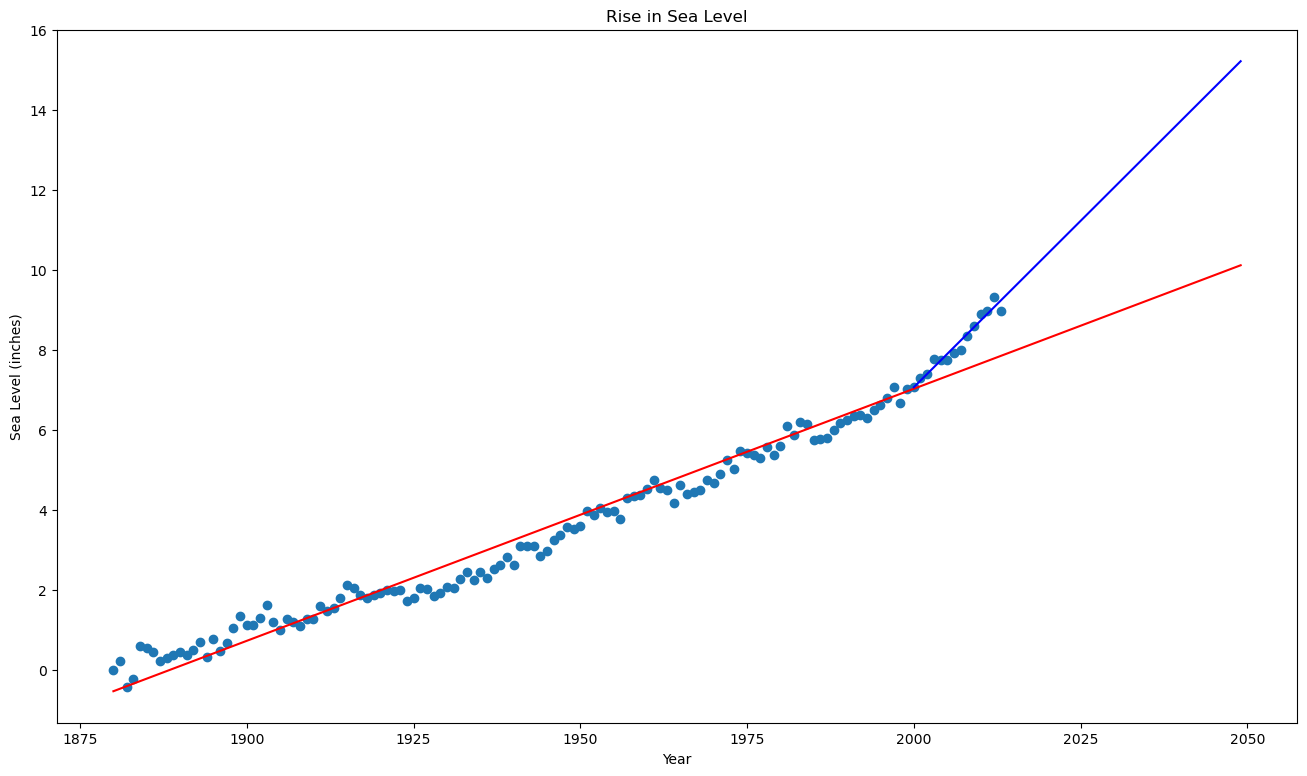

In [3]:
sea_level_predictor()